### Guided Project - Classifying Heart Disease

We will be using Logistic Regression in this data set to analyse and predict the heart disease of an individual.

The column information is as below.

Only 14 attributes used:
1. (age) - age in years
2. (sex) -(1 = male; 0 = female)
3. (cp) - cp: chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic
4. (trestbps) - resting blood pressure (in mm Hg on admission to the hospital)
5. (chol) - serum cholestoral in mg/dl
6. (fbs) - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. (restecg) - resting electrocardiographic results
-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria
8. (thalach) - maximum heart rate achieved
9. (exang) - exercise induced angina (1 = yes; 0 = no)
10. (oldpeak) - ST depression induced by exercise relative to rest
11. (slope) - the slope of the peak exercise ST segment
-- Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping
12. (ca) - number of major vessels (0-3) colored by flourosopy
13. (thal) - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. (num) (the predicted attribute) - diagnosis of heart disease (angiographic disease status)
-- Value 0: < 50% diameter narrowing
-- Value 1: > 50% diameter narrowing
(in any major vessel: attributes 59 through 68 are vessels)

In [1]:
#import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score 

In [2]:
#load the data set to heart
heart = pd.read_csv('heart_disease.csv')

#### Data Cleaning and Exploratory Data Analysis

In [3]:
#display the first 5 rows of the dataframe
heart.head(5)

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,present
0,1,63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,2,67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,1
2,3,67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,4,37,1,3,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,5,41,0,2,130,204,0,2,172,0,1.4,1,0.0,3.0,0


In [4]:
#Display the rows and columns in the data set
heart.shape

(303, 15)

In [5]:
#Display the null values
heart.isnull().sum()

Unnamed: 0    0
age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
slope         0
ca            0
thal          0
present       0
dtype: int64

In [6]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


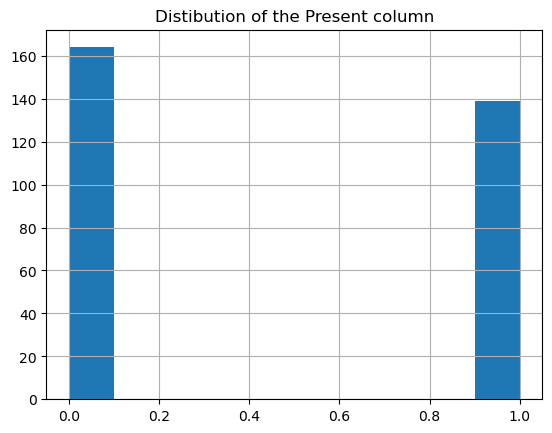

In [7]:
#check the outcome
heart['present'].hist()
plt.title("Distibution of the Present column")
plt.show()

In [8]:
#Display the value counts of the column Present
heart['present'].value_counts()

0    164
1    139
Name: present, dtype: int64

In [9]:
#Display the value counts of the column Thal
heart['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [10]:
#remove the 2 rows where 'thal' column contains '?'
heart = heart.drop(heart[heart['thal'] == '?'].index)
heart['thal'] = heart['thal'].astype(float)

In [11]:
#Display value counts of the column ca
heart['ca'].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
?        4
Name: ca, dtype: int64

In [12]:
#remove the 4 rows where 'ca' column contains '?'
heart = heart.drop(heart[heart['ca'] == '?'].index)
heart['ca'] = heart['ca'].astype(float)

In [13]:
heart['ca'].value_counts()

0.0    174
1.0     65
2.0     38
3.0     20
Name: ca, dtype: int64

In [14]:
heart.groupby("present").agg({"age": "mean","exang": "mean", "oldpeak": "mean","slope": "mean","sex": "mean","cp": "mean","trestbps": "mean","chol": "mean","fbs": "mean","restecg": "mean","thalach": "mean","thal": "mean","ca": "mean"} )

,age,exang,oldpeak,slope,sex,cp,trestbps,chol,fbs,restecg,thalach,thal,ca
present,,,,,,,,,,,,,
0,52.643750,0.143750,0.598750,1.412500,0.556250,2.793750,129.175000,243.493750,0.143750,0.843750,158.581250,3.787500,0.275000
1,56.759124,0.540146,1.589051,1.824818,0.817518,3.583942,134.635036,251.854015,0.145985,1.175182,139.109489,5.832117,1.145985


From the above results we will be using only some of the columns for feature selection.

/tmp/ipykernel_64/719375412.py:2: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared
  heart.hist(ax = ax)


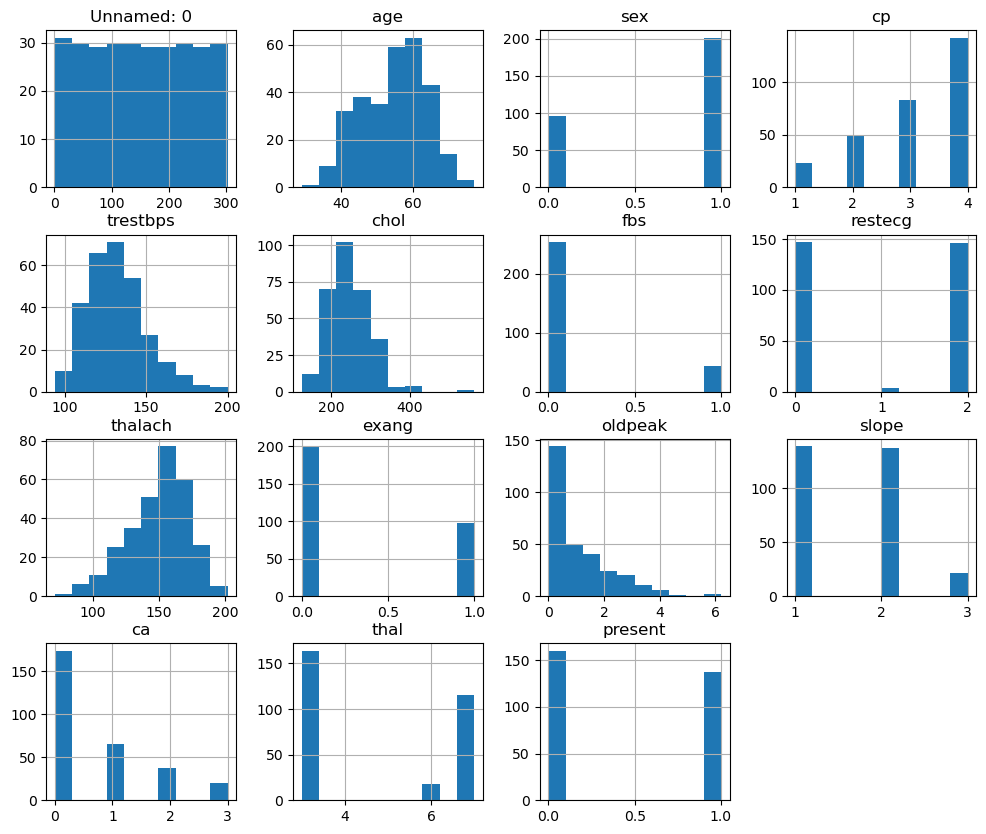

In [15]:
fig, ax = plt.subplots(figsize = (12,10))
heart.hist(ax = ax)
plt.show()

From the above graphs, the column 'Unnamed' from distribution it is difficult to interprit any meaning. We can remove that column from the data set.

#### Feature Selection

We will be using the below feature to further train the model
* age
* sex
* cp
* trestbps
* chol
* fbs
* restecg
* thalach
* exang
* oldpeak
* ca
* thal

In [16]:
X = heart.drop(['Unnamed: 0','present','slope'], axis = 1)
y = heart['present']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 217)

In [18]:
#check the X_train and X_test data set distibution
y_train.value_counts()

0    127
1    110
Name: present, dtype: int64

In [19]:
y_test.value_counts()

0    33
1    27
Name: present, dtype: int64

from above results we can see that there is both detected and non detected in both Train and test data sets.

#### Building the Machine Learning Model

In [20]:
model = LogisticRegression()

In [21]:
#fitting the model on training data set
model.fit(X_train, y_train)

#calculate the accurcy of the model
accuracy = model.score(X_train, y_train)

y_train_pred = model.predict(X_train)

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [22]:
tp = sum((y_train == 1) & (y_train_pred == 1))
fp = sum((y_train== 0) & (y_train_pred == 1))
tn = sum((y_train == 0) & (y_train_pred == 0))
fn = sum((y_train== 1) & (y_train_pred == 0))

sensivity = tp /(tp+fp)
specificity = tn/(tn+fn)

print('Training accuracy :', accuracy)
print('Training sensivity :' , sensivity)
print('Training specificity :' , specificity )

Training accuracy : 0.8354430379746836
Training sensivity : 0.8585858585858586
Training specificity : 0.8188405797101449


As shown above results the Accuracy of the model is 83.6%, Sensivity of the model is 85.85% and specificity of the model is 81.88%.

In [23]:
#calculate the coefficient of the model
coefficient = model.coef_
coefficient

array([[-0.03323468,  0.66161183,  0.32343594,  0.01746167,  0.00203701,
        -0.38751969,  0.32434727, -0.03832644,  0.75342516,  0.29907061,
         1.10826628,  0.36608315]])

#### Model Evaluation

In [24]:
#predict the output
y_pred = model.predict(X_test)

#calculate the accuracy_score for the y_pred
accuracy_test = model.score(X_test,y_test)
accuracy_test

tp = sum((y_test == 1) & (y_pred == 1))
fp = sum((y_test== 0) & (y_pred == 1))
tn = sum((y_test == 0) & (y_pred == 0))
fn = sum((y_test== 1) & (y_pred == 0))

sensivity_test = tp /(tp+fp)
specificity_test = tn/(tn+fn)

print('Test accuracy :', accuracy_test)
print('Test sensivity :' , sensivity_test)
print('Test specificity :' , specificity_test )

Test accuracy : 0.8833333333333333
Test sensivity : 0.8846153846153846
Test specificity : 0.8823529411764706


#### Conclusions

From the test predictions we can see that the Test Accuracy is 88.33%, Sesivity is 88.46% and Specificity is 88.24%. From the training data set there is not much of a difference in the accuracy of the model.
